In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
with open('fulldataframe.pickle', 'rb') as f:
    df = pickle.load(f)

# Need to get brands in the dataframe too: more scraping TO DO

In [42]:
for p in df.price:
    if len(p)<5:
        p+='0'
rates,prices=[],[]
for r,p in zip(df.rating, df.price):
    rates.append(float(r))
    prices.append(float(p))
df['price']=prices
df['rating']=rates

In [49]:
with open('df.pickle', 'wb') as f:
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

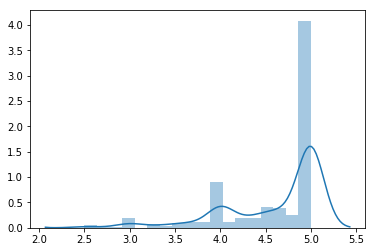

In [45]:
sns.distplot(list(df.rating))

,price,prodName,rating,age,darkcircles,acne,dry,redness,sensitive,oil,normal,treats,type
url,,,,,,,,,,,,,
11401318,425.0,3LAB Anti-Ageing Eye Lift 15ml,3.67,0,1,0,0,0,0,0,0,7,[eye]
11805860,520.0,SkinMedica Award Winning System (Worth $613.00),4.00,1,0,0,0,0,0,0,0,8,"[serum, moisturizer]"
11401312,900.0,3LAB Super Cream 50ml,3.00,1,0,0,0,0,0,0,0,8,[moisturizer]
11401316,475.0,3LAB Super Eye Treatment 20ml,5.00,1,0,0,0,0,0,0,0,8,[eye]
10997777,410.0,Omorovicza Blue Diamond Concentrate (1 oz.),5.00,1,0,0,0,0,0,0,0,8,[]


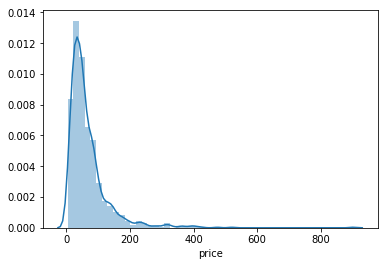

In [47]:
sns.distplot(df.price)
df[df['price']>400]

In [2]:
import requests
from bs4 import BeautifulSoup

In [25]:
response=requests.get('https://www.skinstore.com/skin-care/makeup-removers.list')
soup=BeautifulSoup(response.content,'html.parser')
images=soup.findAll('div',{'class':'productBlock_imageContainer'},{'src':True})

In [36]:
imgs=[]
for i in images:
     imgs.append(str(i).split('"')[-2])

In [29]:
str(i).split('src="')[1].replace('">\n</img></div>','')

'"https://s4.thcdn.com/productimg/300/300/10364667-1974493647737453.jpg">\n</img></div>'

In [37]:
imgs

['https://s4.thcdn.com/productimg/300/300/10364667-1974493647737453.jpg',
 'https://s3.thcdn.com/productimg/300/300/11254613-1864385546303325.jpg',
 'https://s4.thcdn.com/productimg/0/300/300/30/10941230-1397494493-297980.jpg',
 'https://s3.thcdn.com/productimg/300/300/10363611-6764608721615863.jpg',
 'https://s2.thcdn.com/productimg/300/300/11207442-2484587225629865.jpg',
 'https://s3.thcdn.com/productimg/300/300/10727688-1724577813934678.jpg',
 'https://s3.thcdn.com/productimg/300/300/10365659-8594643145222687.jpg',
 'https://s3.thcdn.com/productimg/300/300/11207526-1684587225697641.jpg',
 'https://s2.thcdn.com/productimg/300/300/11331872-6324587226660296.jpg',
 'https://s3.thcdn.com/productimg/300/300/11305289-1554405025178294.jpg',
 'https://s2.thcdn.com/productimg/300/300/11207547-1674587225759249.jpg',
 'https://s1.thcdn.com/productimg/300/300/11207546-8124648071391272.jpg',
 'https://s1.thcdn.com/productimg/300/300/11597712-1474684887592728.jpg',
 'https://s4.thcdn.com/productim

In [35]:
str(i).split('"')[-2]

'https://s4.thcdn.com/productimg/300/300/10364667-1974493647737453.jpg'